<a href="https://colab.research.google.com/github/vicpb/machine-learning-introd-sis-recomen-em-python-alura/blob/main/Introducao_a_Recomendacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

filmes = pd.read_csv('movies.csv')
filmes.columns = ["filmeId", "titulo", "generos"]
filmes = filmes.set_index("filmeId")
filmes.head()

,titulo,generos
filmeId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


In [2]:
notas = pd.read_csv('ratings.csv')
notas.columns = ["usuarioId","filmeId", "nota", "momento"]
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703.0
1,1,3,4.0,964981247.0
2,1,6,4.0,964982224.0
3,1,47,5.0,964983815.0
4,1,50,5.0,964982931.0


In [3]:
notas.describe()

,usuarioId,filmeId,nota,momento
count,43084.000000,43084.000000,43084.000000,4.308300e+04
mean,145.216206,18582.328103,3.566951,1.181536e+09
std,85.595025,35281.316493,1.022535,2.146729e+08
min,1.000000,1.000000,0.500000,8.293223e+08
25%,68.000000,1090.000000,3.000000,9.785596e+08
50%,140.000000,2791.000000,4.000000,1.161566e+09
75%,221.000000,7155.000000,4.000000,1.393542e+09
max,288.000000,193587.000000,5.000000,1.537650e+09


#Primeira tentativa de recomendação: heurística de total de votos

In [4]:
total_de_votos = notas['filmeId'].value_counts()
total_de_votos.head()

356     153
296     151
318     147
2571    134
593     131
Name: filmeId, dtype: int64

In [5]:
filmes['total_de_votos'] = total_de_votos
filmes.head()

,titulo,generos,total_de_votos
filmeId,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,107.0
2,Jumanji (1995),Adventure|Children|Fantasy,45.0
3,Grumpier Old Men (1995),Comedy|Romance,26.0
4,Waiting to Exhale (1995),Comedy|Drama|Romance,5.0
5,Father of the Bride Part II (1995),Comedy,25.0


In [6]:
filmes.sort_values("total_de_votos", ascending = False).head(10)

,titulo,generos,total_de_votos
filmeId,,,
356,Forrest Gump (1994),Comedy|Drama|Romance|War,153.0
296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,151.0
318,"Shawshank Redemption, The (1994)",Crime|Drama,147.0
2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,134.0
593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,131.0
260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,119.0
110,Braveheart (1995),Action|Drama|War,110.0
480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,109.0
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,107.0


In [7]:
notas_medias = notas.groupby("filmeId").mean()["nota"]
notas_medias.head()

filmeId
1    3.897196
2    3.366667
3    3.538462
4    2.600000
5    3.480000
Name: nota, dtype: float64

In [8]:
filmes["nota_media"] = notas_medias
filmes.sort_values("total_de_votos", ascending = False).head(10)

,titulo,generos,total_de_votos,nota_media
filmeId,,,,
356,Forrest Gump (1994),Comedy|Drama|Romance|War,153.0,4.104575
296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,151.0,4.029801
318,"Shawshank Redemption, The (1994)",Crime|Drama,147.0,4.411565
2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,134.0,4.152985
593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,131.0,4.148855
260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,119.0,4.256303
110,Braveheart (1995),Action|Drama|War,110.0,4.004545
480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,109.0,3.761468
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,107.0,3.897196


# Uma segunda heurística: nota média e filtrando votos



In [9]:
filmes.sort_values("nota_media", ascending = False).head(10)

,titulo,generos,total_de_votos,nota_media
filmeId,,,,
86721,Idiots and Angels (2008),Animation|Drama|Fantasy,1.0,5.0
2204,Saboteur (1942),Mystery|Thriller,1.0,5.0
93022,Miss Nobody (2010),Comedy|Crime,1.0,5.0
93008,"Very Potter Sequel, A (2010)",Comedy|Musical,1.0,5.0
120478,The Salt of the Earth (2014),Documentary,1.0,5.0
7008,Last Tango in Paris (Ultimo tango a Parigi) (1...,Drama|Romance,2.0,5.0
92643,Monsieur Lazhar (2011),Children|Comedy|Drama,1.0,5.0
92494,Dylan Moran: Monster (2004),Comedy|Documentary,1.0,5.0
31364,Memories of Murder (Salinui chueok) (2003),Crime|Drama|Mystery|Thriller,1.0,5.0


In [10]:
filmes.query("total_de_votos >= 10").sort_values("nota_media", ascending = False).head(10)

,titulo,generos,total_de_votos,nota_media
filmeId,,,,
1212,"Third Man, The (1949)",Film-Noir|Mystery|Thriller,12.0,4.666667
898,"Philadelphia Story, The (1940)",Comedy|Drama|Romance,13.0,4.576923
922,Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),Drama|Film-Noir|Romance,14.0,4.464286
926,All About Eve (1950),Drama,10.0,4.450000
1250,"Bridge on the River Kwai, The (1957)",Adventure|Drama|War,19.0,4.421053
318,"Shawshank Redemption, The (1994)",Crime|Drama,147.0,4.411565
3275,"Boondock Saints, The (2000)",Action|Crime|Drama|Thriller,22.0,4.409091
1209,Once Upon a Time in the West (C'era una volta ...,Action|Drama|Western,11.0,4.363636
475,In the Name of the Father (1993),Drama,14.0,4.357143


In [11]:
filmes_com_mais_de_50_votos = filmes.query("total_de_votos >= 50")
filmes_com_mais_de_50_votos.sort_values("nota_media", ascending = False).head(10)

,titulo,generos,total_de_votos,nota_media
filmeId,,,,
318,"Shawshank Redemption, The (1994)",Crime|Drama,147.0,4.411565
58559,"Dark Knight, The (2008)",Action|Crime|Drama|IMAX,67.0,4.350746
1197,"Princess Bride, The (1987)",Action|Adventure|Comedy|Fantasy|Romance,70.0,4.307143
260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,119.0,4.256303
1196,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi,105.0,4.252381
50,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,94.0,4.250000
1198,Raiders of the Lost Ark (Indiana Jones and the...,Action|Adventure,99.0,4.227273
1193,One Flew Over the Cuckoo's Nest (1975),Drama,66.0,4.227273
527,Schindler's List (1993),Drama|War,96.0,4.208333


In [12]:
eu_assisti = [1, 21, 19, 10, 11, 7, 2]
filmes.loc[eu_assisti]

,titulo,generos,total_de_votos,nota_media
filmeId,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,107.0,3.897196
21,Get Shorty (1995),Comedy|Crime|Thriller,43.0,3.604651
19,Ace Ventura: When Nature Calls (1995),Comedy,39.0,2.756410
10,GoldenEye (1995),Action|Adventure|Thriller,59.0,3.516949
11,"American President, The (1995)",Comedy|Drama|Romance,32.0,3.906250
7,Sabrina (1995),Comedy|Romance,31.0,3.274194
2,Jumanji (1995),Adventure|Children|Fantasy,45.0,3.366667


In [13]:
aventura_infantil_e_fantasia = filmes_com_mais_de_50_votos.query("generos=='Adventure|Children|Fantasy'")
aventura_infantil_e_fantasia.drop(eu_assisti, errors = 'ignore').sort_values("nota_media", ascending = False).head(10)

,titulo,generos,total_de_votos,nota_media
filmeId,,,,
4896,Harry Potter and the Sorcerer's Stone (a.k.a. ...,Adventure|Children|Fantasy,52.0,3.846154


In [14]:
# Collaborative filtering X Content based filtering

# Procurar usuários "similares"

- João deu nota 4 no filme toy story
- maria deu nota 5 no filme toy story
- paulo deu nota 3 no filme toy story
- joana deu nota 3.5 no filme toy story

x - y => distância

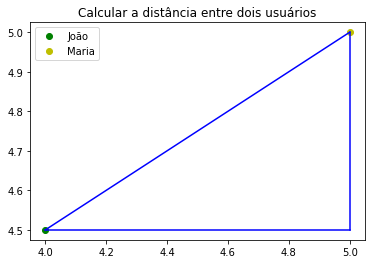

In [15]:
# joao = [4, 4.5]
# maria = [5, 5]

import matplotlib.pyplot as plt

plt.plot(4, 4.5, "go")
plt.plot(5, 5, "yo")
plt.legend(["João", "Maria"])
plt.title("Calcular a distância entre dois usuários")

plt.plot([4, 5],[4.5, 4.5], color="b", linestyle="-")
plt.plot([4, 5],[4.5, 5], color="b", linestyle="-")
plt.plot([5, 5],[4.5, 5], color="b", linestyle="-")

In [16]:
import numpy as np

joao = np.array([4, 4.5])
maria = np.array([5, 5])

joao - maria

array([-1. , -0.5])

In [17]:
from math import sqrt

def pitagoras(a, b):
  (delta_x, delta_y) = a - b
  return sqrt(delta_x * delta_x + delta_y * delta_y)

pitagoras(joao, maria)

1.118033988749895

In [18]:
def pitagoras(a, b):
  return np.linalg.norm(a - b)
  
pitagoras(joao, maria)

1.118033988749895

Text(0.5, 1.0, 'Calcular a distância entre usuários')

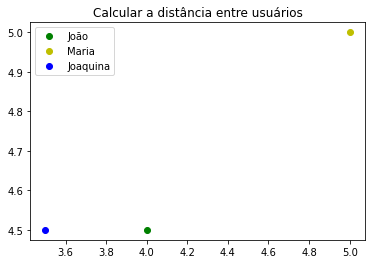

In [19]:
import matplotlib.pyplot as plt

plt.plot(4, 4.5, "go")
plt.plot(5, 5, "yo")
plt.plot(3.5, 4.5, "bo")
plt.legend(["João", "Maria", "Joaquina"])
plt.title("Calcular a distância entre usuários")

In [20]:
joaquina = np.array([3.5, 4.5])
print(pitagoras(joao, maria))
print(pitagoras(joao, joaquina))

1.118033988749895
0.5


# Distância entre usuários do dataset

In [39]:
def distancia_de_vetores(a, b):
  return np.linalg.norm(a - b)

In [29]:
def notas_do_usuario(usuario):
  notas_do_usuario = notas.query("usuarioId == %d" % usuario)
  notas_do_usuario = notas_do_usuario[["filmeId", "nota"]].set_index("filmeId")
  return notas_do_usuario

In [31]:
usuario1 = notas_do_usuario(1)
usuario4 = notas_do_usuario(4)

In [33]:
usuario1.head()

,nota
filmeId,
1,4.0
3,4.0
6,4.0
47,5.0
50,5.0


In [34]:
usuario4.head()

,nota
filmeId,
21,3.0
32,2.0
45,3.0
47,2.0
52,3.0


In [41]:
diferencas = usuario1.join(usuario4, lsuffix="_esquerda", rsuffix="_direita").dropna()
distancia_de_vetores(diferencas['nota_esquerda'], diferencas['nota_direita'])

11.135528725660043

In [48]:
def distancia_de_usuarios(usuario_id1, usuario_id2):
  notas1 = notas_do_usuario(usuario_id1)
  notas2 = notas_do_usuario(usuario_id2)
  diferencas = notas1.join(notas2, lsuffix="_esquerda", rsuffix="_direita").dropna()
  distancia = distancia_de_vetores(diferencas['nota_esquerda'], diferencas['nota_direita'])
  return [usuario_id1, usuario_id2, distancia]

In [49]:
distancia_de_usuarios(1, 4)

[1, 4, 11.135528725660043]

In [50]:
quantidade_de_usuarios = len(notas['usuarioId'].unique())
print("Temos %d usuarios" % quantidade_de_usuarios)

Temos 288 usuarios


In [56]:
def distancia_de_todos(voce_id):

  distancias = []

  for usuario_id in notas['usuarioId'].unique():
    informacoes = distancia_de_usuarios(voce_id, usuario_id)
    distancias.append(informacoes)
  return distancias

distancia_de_todos(1)[:5]

[[1, 1, 0.0],
 [1, 2, 1.4142135623730951],
 [1, 3, 8.200609733428363],
 [1, 4, 11.135528725660043],
 [1, 5, 3.7416573867739413]]

In [60]:
def distancia_de_todos(voce_id):
  todos_os_usuarios = notas['usuarioId'].unique()
  distancias = [distancia_de_usuarios(voce_id, usuario_id) for usuario_id in todos_os_usuarios]
  distancias = pd.DataFrame(distancias, columns = ["Voce", "outra_pessoa", "distancia"])
  return distancias

distancia_de_todos(1).head()

,Voce,outra_pessoa,distancia
0,1,1,0.000000
1,1,2,1.414214
2,1,3,8.200610
3,1,4,11.135529
4,1,5,3.741657


# Usuários sem nada em comum são colocados bem distante um do outro

In [66]:
minimo = 5
def distancia_de_usuarios(usuario_id1, usuario_id2, minimo = 5):
  notas1 = notas_do_usuario(usuario_id1)
  notas2 = notas_do_usuario(usuario_id2)
  diferencas = notas1.join(notas2, lsuffix="_esquerda", rsuffix="_direita").dropna()

  if(len(diferencas) < minimo):
    return [usuario_id1, usuario_id2, 100000]

  distancia = distancia_de_vetores(diferencas['nota_esquerda'], diferencas['nota_direita'])
  return [usuario_id1, usuario_id2, distancia]

In [67]:
distancia_de_todos(1).head()

,Voce,outra_pessoa,distancia
0,1,1,0.000000
1,1,2,100000.000000
2,1,3,8.200610
3,1,4,11.135529
4,1,5,3.741657


In [72]:
def mais_proximos_de(voce_id):
  distancias = distancia_de_todos(voce_id)
  distancias = distancias.sort_values("distancia")
  distancias = distancias.set_index("outra_pessoa").drop(voce_id)
  return distancias

In [74]:
mais_proximos_de(1)

,Voce,distancia
outra_pessoa,,
77,1,0.000000
49,1,1.000000
258,1,1.000000
9,1,1.000000
65,1,1.322876
...,...,...
245,1,100000.000000
257,1,100000.000000
250,1,100000.000000


# Parâmetros para teste

In [76]:
def mais_proximos_de(voce_id, n = None):
  distancias = distancia_de_todos(voce_id, n = n)
  distancias = distancias.sort_values("distancia")
  distancias = distancias.set_index("outra_pessoa").drop(voce_id)
  return distancias

In [77]:
def distancia_de_todos(voce_id, n = None):
  todos_os_usuarios = notas['usuarioId'].unique()
  if n:
    todos_os_usuarios = todos_os_usuarios[:n]
  distancias = [distancia_de_usuarios(voce_id, usuario_id) for usuario_id in todos_os_usuarios]
  distancias = pd.DataFrame(distancias, columns = ["Voce", "outra_pessoa", "distancia"])
  return distancias

In [79]:
mais_proximos_de(1, n = 50)

,Voce,distancia
outra_pessoa,,
49,1,1.000000
9,1,1.000000
13,1,1.414214
25,1,1.414214
30,1,1.802776
35,1,2.236068
26,1,2.236068
46,1,3.316625
8,1,3.741657


In [83]:
minimo = 5
def distancia_de_usuarios(usuario_id1, usuario_id2, minimo = 5):
  notas1 = notas_do_usuario(usuario_id1)
  notas2 = notas_do_usuario(usuario_id2)
  diferencas = notas1.join(notas2, lsuffix="_esquerda", rsuffix="_direita").dropna()

  if(len(diferencas) < minimo):
    return None

  distancia = distancia_de_vetores(diferencas['nota_esquerda'], diferencas['nota_direita'])
  return [usuario_id1, usuario_id2, distancia]

In [87]:
def distancia_de_todos(voce_id, numero_de_usuarios_a_analisar = None):
  todos_os_usuarios = notas['usuarioId'].unique()
  if numero_de_usuarios_a_analisar:
    todos_os_usuarios = todos_os_usuarios[:numero_de_usuarios_a_analisar]
  distancias = [distancia_de_usuarios(voce_id, usuario_id) for usuario_id in todos_os_usuarios]
  distancias = list(filter(None, distancias))
  distancias = pd.DataFrame(distancias, columns = ["Voce", "outra_pessoa", "distancia"])
  return distancias

In [88]:
def mais_proximos_de(voce_id, numero_de_usuarios_a_analisar = None):
  distancias = distancia_de_todos(voce_id, numero_de_usuarios_a_analisar = numero_de_usuarios_a_analisar)
  distancias = distancias.sort_values("distancia")
  distancias = distancias.set_index("outra_pessoa").drop(voce_id)
  return distancias

In [104]:
def sugere_para(voce, numero_de_usuarios_a_analisar = None):
  notas_de_voce = notas_do_usuario(voce)
  filmes_que_voce_ja_viu = notas_de_voce.index

  similares = mais_proximos_de(voce, numero_de_usuarios_a_analisar = numero_de_usuarios_a_analisar)
  similar = similares.iloc[0].name
  notas_do_similar = notas_do_usuario(similar)
  notas_do_similar = notas_do_similar.drop(filmes_que_voce_ja_viu, errors = 'ignore')
  recomendacoes = notas_do_similar.sort_values("nota", ascending = False)
  return recomendacoes.join(filmes)

In [106]:
sugere_para(1, numero_de_usuarios_a_analisar = 50).head()

,nota,titulo,generos,total_de_votos,nota_media
filmeId,,,,,
1200,4.5,Aliens (1986),Action|Adventure|Horror|Sci-Fi,60.0,3.866667
4022,4.5,Cast Away (2000),Drama,44.0,3.602273
47099,4.5,"Pursuit of Happyness, The (2006)",Drama,25.0,3.800000
79132,4.5,Inception (2010),Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX,61.0,4.008197
109487,4.5,Interstellar (2014),Sci-Fi|IMAX,33.0,3.954545


In [107]:
sugere_para(1).head()

,nota,titulo,generos,total_de_votos,nota_media
filmeId,,,,,
8636,5.0,Spider-Man 2 (2004),Action|Adventure|Sci-Fi|IMAX,39.0,3.897436
58559,5.0,"Dark Knight, The (2008)",Action|Crime|Drama|IMAX,67.0,4.350746
33794,5.0,Batman Begins (2005),Action|Crime|IMAX,51.0,3.901961
4993,5.0,"Lord of the Rings: The Fellowship of the Ring,...",Adventure|Fantasy,87.0,4.011494
5349,5.0,Spider-Man (2002),Action|Adventure|Sci-Fi|Thriller,58.0,3.500000


# Sugerindo baseado em vários usuários

In [109]:
def mais_proximos_de(voce_id, n_mais_proximos = 10, numero_de_usuarios_a_analisar = None):
  distancias = distancia_de_todos(voce_id, numero_de_usuarios_a_analisar = numero_de_usuarios_a_analisar)
  distancias = distancias.sort_values("distancia")
  distancias = distancias.set_index("outra_pessoa").drop(voce_id)
  return distancias.head(n_mais_proximos)

In [111]:
mais_proximos_de(1, n_mais_proximos = 2, numero_de_usuarios_a_analisar=300)

,Voce,distancia
outra_pessoa,,
77,1,0.0
49,1,1.0


In [122]:
def sugere_para(voce, n_mais_proximos = 10, numero_de_usuarios_a_analisar = None):
  notas_de_voce = notas_do_usuario(voce)
  filmes_que_voce_ja_viu = notas_de_voce.index

  similares = mais_proximos_de(voce, n_mais_proximos = n_mais_proximos, numero_de_usuarios_a_analisar = numero_de_usuarios_a_analisar)
  usuarios_similares = similares.index
  notas_do_similares = notas.set_index("usuarioId").loc[usuarios_similares]
  recomendacoes = notas_do_similares.groupby("filmeId").mean()[["nota"]]
  recomendacoes = recomendacoes.sort_values("nota", ascending = False)
  return recomendacoes.join(filmes).head()

In [123]:
sugere_para(1, numero_de_usuarios_a_analisar = 50).head()

,nota,titulo,generos,total_de_votos,nota_media
filmeId,,,,,
187593,5.0,Deadpool 2 (2018),Action|Comedy|Sci-Fi,6.0,4.333333
68157,5.0,Inglourious Basterds (2009),Action|Drama|War,38.0,4.223684
475,5.0,In the Name of the Father (1993),Drama,14.0,4.357143
33794,5.0,Batman Begins (2005),Action|Crime|IMAX,51.0,3.901961
7153,5.0,"Lord of the Rings: The Return of the King, The...",Action|Adventure|Drama|Fantasy,80.0,4.081250


In [124]:
sugere_para(1, numero_de_usuarios_a_analisar = 300).head()

,nota,titulo,generos,total_de_votos,nota_media
filmeId,,,,,
187593,5.0,Deadpool 2 (2018),Action|Comedy|Sci-Fi,6.0,4.333333
3752,5.0,"Me, Myself & Irene (2000)",Adventure|Comedy,19.0,3.184211
818,5.0,"Very Brady Sequel, A (1996)",Comedy,5.0,3.400000
8636,5.0,Spider-Man 2 (2004),Action|Adventure|Sci-Fi|IMAX,39.0,3.897436
802,5.0,Phenomenon (1996),Drama|Romance,19.0,3.631579


In [125]:
sugere_para(1).head()

,nota,titulo,generos,total_de_votos,nota_media
filmeId,,,,,
187593,5.0,Deadpool 2 (2018),Action|Comedy|Sci-Fi,6.0,4.333333
3752,5.0,"Me, Myself & Irene (2000)",Adventure|Comedy,19.0,3.184211
818,5.0,"Very Brady Sequel, A (1996)",Comedy,5.0,3.400000
8636,5.0,Spider-Man 2 (2004),Action|Adventure|Sci-Fi|IMAX,39.0,3.897436
802,5.0,Phenomenon (1996),Drama|Romance,19.0,3.631579


In [127]:
# K-nearest neighbors algorithm - KNN

def knn(voce_id, k_mais_proximos = 10, numero_de_usuarios_a_analisar = None):
  distancias = distancia_de_todos(voce_id, numero_de_usuarios_a_analisar = numero_de_usuarios_a_analisar)
  distancias = distancias.sort_values("distancia")
  distancias = distancias.set_index("outra_pessoa").drop(voce_id)
  return distancias.head(k_mais_proximos)

In [128]:
def sugere_para(voce, k_mais_proximos = 10, numero_de_usuarios_a_analisar = None):
  notas_de_voce = notas_do_usuario(voce)
  filmes_que_voce_ja_viu = notas_de_voce.index

  similares = knn(voce, k_mais_proximos = k_mais_proximos, numero_de_usuarios_a_analisar = numero_de_usuarios_a_analisar)
  usuarios_similares = similares.index
  notas_do_similares = notas.set_index("usuarioId").loc[usuarios_similares]
  recomendacoes = notas_do_similares.groupby("filmeId").mean()[["nota"]]
  recomendacoes = recomendacoes.sort_values("nota", ascending = False)
  return recomendacoes.join(filmes).head()

# Testar um usuário novo

In [129]:
filmes.loc[[122904, 1246, 2529, 2329, 2324, 1, 7, 2, 1196, 260]]

,titulo,generos,total_de_votos,nota_media
filmeId,,,,
122904,Deadpool (2016),Action|Adventure|Comedy|Sci-Fi,27.0,3.814815
1246,Dead Poets Society (1989),Drama,34.0,4.000000
2529,Planet of the Apes (1968),Action|Drama|Sci-Fi,21.0,3.857143
2329,American History X (1998),Crime|Drama,57.0,4.131579
2324,Life Is Beautiful (La Vita è bella) (1997),Comedy|Drama|Romance|War,36.0,3.930556
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,107.0,3.897196
7,Sabrina (1995),Comedy|Romance,31.0,3.274194
2,Jumanji (1995),Adventure|Children|Fantasy,45.0,3.366667
1196,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi,105.0,4.252381


In [131]:
def novo_usuario(dados):
  novo_usuario = notas['usuarioId'].max()+1
  notas_do_usuario_novo = pd.DataFrame(dados, columns=["filmeId", "nota"])
  notas_do_usuario_novo['usuarioId'] = novo_usuario
  return pd.concat([notas, notas_do_usuario_novo])

In [132]:
notas = novo_usuario([[122904,2],[1246,5],[2529,2],[2329,5],[2324,5],[1,2],[7,0.5],[2,2],[1196,1],[260,1]])
notas.tail()

,usuarioId,filmeId,nota,momento
5,289,1,2.0,NaN
6,289,7,0.5,NaN
7,289,2,2.0,NaN
8,289,1196,1.0,NaN
9,289,260,1.0,NaN


In [135]:
sugere_para(61).head()

,nota,titulo,generos,total_de_votos,nota_media
filmeId,,,,,
1889,5.0,Insomnia (1997),Drama|Mystery|Thriller,4.0,3.875000
1089,5.0,Reservoir Dogs (1992),Crime|Mystery|Thriller,58.0,4.206897
3083,5.0,All About My Mother (Todo sobre mi madre) (1999),Drama,8.0,4.562500
3089,5.0,Bicycle Thieves (a.k.a. The Bicycle Thief) (a....,Drama,6.0,4.500000
122900,5.0,Ant-Man (2015),Action|Adventure|Sci-Fi,10.0,4.050000


#Utilizar somente as notas de filmes com mais de 50 votos

In [139]:
notas = notas.set_index("filmeId").loc[filmes_com_mais_de_50_votos.index]
notas.head()

,usuarioId,nota,momento
filmeId,,,
1,1,4.0,9.649827e+08
1,5,4.0,8.474350e+08
1,7,4.5,1.106636e+09
1,15,2.5,1.510578e+09
1,17,4.5,1.305696e+09


In [140]:
notas = notas.reset_index()
notas.head()

,filmeId,usuarioId,nota,momento
0,1,1,4.0,9.649827e+08
1,1,5,4.0,8.474350e+08
2,1,7,4.5,1.106636e+09
3,1,15,2.5,1.510578e+09
4,1,17,4.5,1.305696e+09


In [141]:
sugere_para(61).head()

,nota,titulo,generos,total_de_votos,nota_media
filmeId,,,,,
1136,5.000,Monty Python and the Holy Grail (1975),Adventure|Comedy|Fantasy,65.0,4.146154
32,5.000,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller,83.0,4.084337
858,5.000,"Godfather, The (1972)",Crime|Drama,91.0,4.148352
293,5.000,Léon: The Professional (a.k.a. The Professiona...,Action|Crime|Drama|Thriller,58.0,4.025862
608,4.875,Fargo (1996),Comedy|Crime|Drama|Thriller,90.0,4.183333


In [162]:
def sugere_para(voce, k_mais_proximos = 10, numero_de_usuarios_a_analisar = None):
  notas_de_voce = notas_do_usuario(voce)
  filmes_que_voce_ja_viu = notas_de_voce.index

  similares = knn(voce, k_mais_proximos = k_mais_proximos, numero_de_usuarios_a_analisar = numero_de_usuarios_a_analisar)
  usuarios_similares = similares.index
  notas_do_similares = notas.set_index("usuarioId").loc[usuarios_similares]
  recomendacoes = notas_do_similares.groupby("filmeId").mean()[["nota"]]
  aparicoes = notas_do_similares.groupby("filmeId").count()[['nota']]

  filtro_minimo = k_mais_proximos / 2
  recomendacoes = recomendacoes.join(aparicoes, lsuffix = "_media_dos_usuarios", rsuffix = "_aparicoes_nos_usuarios")
  recomendacoes.query("nota_aparicoes_nos_usuarios >=  %.2f" % filtro_minimo)
  recomendacoes = recomendacoes.sort_values("nota_media_dos_usuarios", ascending = False)
  recomendacoes = recomendacoes.drop(filmes_que_voce_ja_viu, errors = 'ignore')
  return recomendacoes.join(filmes)

In [163]:
# K-nearest neighbors algorithm - KNN

def knn(voce_id, k_mais_proximos = 10, numero_de_usuarios_a_analisar = None):
  distancias = distancia_de_todos(voce_id, numero_de_usuarios_a_analisar = numero_de_usuarios_a_analisar)
  distancias = distancias.sort_values("distancia")
  distancias = distancias.set_index("outra_pessoa").drop(voce_id, errors = 'ignore')
  return distancias.head(k_mais_proximos)

In [164]:
sugere_para(1, numero_de_usuarios_a_analisar = 500)

,nota_media_dos_usuarios,nota_aparicoes_nos_usuarios,titulo,generos,total_de_votos,nota_media
filmeId,,,,,,
58559,5.000000,2,"Dark Knight, The (2008)",Action|Crime|Drama|IMAX,67.0,4.350746
33794,5.000000,1,Batman Begins (2005),Action|Crime|IMAX,51.0,3.901961
8961,5.000000,1,"Incredibles, The (2004)",Action|Adventure|Animation|Children|Comedy,58.0,3.767241
3996,5.000000,2,"Crouching Tiger, Hidden Dragon (Wo hu cang lon...",Action|Drama|Romance,50.0,3.950000
1193,5.000000,2,One Flew Over the Cuckoo's Nest (1975),Drama,66.0,4.227273
5349,5.000000,1,Spider-Man (2002),Action|Adventure|Sci-Fi|Thriller,58.0,3.500000
4993,4.833333,3,"Lord of the Rings: The Fellowship of the Ring,...",Adventure|Fantasy,87.0,4.011494
5952,4.833333,3,"Lord of the Rings: The Two Towers, The (2002)",Adventure|Fantasy,88.0,3.948864
7153,4.833333,3,"Lord of the Rings: The Return of the King, The...",Action|Adventure|Drama|Fantasy,80.0,4.081250


In [165]:
sugere_para(61).head(10)

,nota_media_dos_usuarios,nota_aparicoes_nos_usuarios,titulo,generos,total_de_votos,nota_media
filmeId,,,,,,
1136,5.000000,2,Monty Python and the Holy Grail (1975),Adventure|Comedy|Fantasy,65.0,4.146154
858,5.000000,1,"Godfather, The (1972)",Crime|Drama,91.0,4.148352
608,4.875000,4,Fargo (1996),Comedy|Crime|Drama|Thriller,90.0,4.183333
527,4.750000,2,Schindler's List (1993),Drama|War,96.0,4.208333
364,4.750000,2,"Lion King, The (1994)",Adventure|Animation|Children|Drama|Musical|IMAX,79.0,4.031646
1240,4.750000,2,"Terminator, The (1984)",Action|Sci-Fi|Thriller,60.0,4.008333
58559,4.666667,3,"Dark Knight, The (2008)",Action|Crime|Drama|IMAX,67.0,4.350746
6377,4.500000,5,Finding Nemo (2003),Adventure|Animation|Children|Comedy,67.0,3.940299
1073,4.500000,2,Willy Wonka & the Chocolate Factory (1971),Children|Comedy|Fantasy|Musical,55.0,3.927273


In [166]:
sugere_para(61, k_mais_proximos = 20).head(10)

,nota_media_dos_usuarios,nota_aparicoes_nos_usuarios,titulo,generos,total_de_votos,nota_media
filmeId,,,,,,
858,5.000000,3,"Godfather, The (1972)",Crime|Drama,91.0,4.148352
231,4.875000,4,Dumb & Dumber (Dumb and Dumber) (1994),Adventure|Comedy,62.0,3.193548
1136,4.857143,7,Monty Python and the Holy Grail (1975),Adventure|Comedy|Fantasy,65.0,4.146154
608,4.833333,9,Fargo (1996),Comedy|Crime|Drama|Thriller,90.0,4.183333
58559,4.800000,5,"Dark Knight, The (2008)",Action|Crime|Drama|IMAX,67.0,4.350746
1073,4.666667,6,Willy Wonka & the Chocolate Factory (1971),Children|Comedy|Fantasy|Musical,55.0,3.927273
527,4.666667,6,Schindler's List (1993),Drama|War,96.0,4.208333
47,4.642857,7,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,98.0,3.979592
364,4.600000,5,"Lion King, The (1994)",Adventure|Animation|Children|Drama|Musical|IMAX,79.0,4.031646
